Output variable -> y
y -> Whether the client has subscribed a term deposit or not
Binomial ("yes" or "no")

In [43]:
from google.colab import files
upload = files.upload()

Saving bank-full.csv to bank-full (2).csv


In [44]:
import pandas as pd
df=pd.read_csv("bank-full.csv", sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [45]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [46]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
LE=LabelEncoder()
SS=StandardScaler()
df["job"]=LE.fit_transform(df["job"])
df["marital"]=LE.fit_transform(df["marital"])
df["education"]=LE.fit_transform(df["education"])
df["default"]=LE.fit_transform(df["default"])
df["housing"]=LE.fit_transform(df["housing"])
df["loan"]=LE.fit_transform(df["loan"])
df["contact"]=LE.fit_transform(df["contact"])
df["month"]=LE.fit_transform(df["month"])
df["poutcome"]=LE.fit_transform(df["poutcome"])
df["y"]=LE.fit_transform(df["y"])
df['age']=SS.fit_transform(df[['age']])
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1.606965,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,0.288529,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,-0.747384,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,0.571051,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,-0.747384,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,2.831227,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,2.925401,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,1.512791,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [47]:
X=df.iloc[:,0:16]
Y=df['y']

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=65,train_size=0.8)
X_train.shape,X_test.shape

((36168, 16), (9043, 16))

In [49]:
from sklearn.linear_model import LogisticRegression
LogR=LogisticRegression()
LogR.fit(X_train,Y_train)

Ypred_training=LogR.predict(X_train)
Ypred_test=LogR.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
from sklearn.metrics import accuracy_score
a1=accuracy_score(Y_train, Ypred_training)
a2=accuracy_score(Y_test, Ypred_test)
print('Training accuracy --->', a1.round(4)*100,' ','Testing accuracy --->',(a2*100).round(2))

Training accuracy ---> 88.81   Testing accuracy ---> 88.9


In [66]:
Y_pred = LogR.predict(X) #default of 0.5 as cutoff
Y_pred=pd.DataFrame(Y_pred)
df['Y_probabilities'] = LogR.predict_proba(X)[:,1]

#function to change the cutoff
def  f1(x):
    if x<0.5:
        return 0
    else:
        return 1
df['Y_prob']=df['Y_probabilities'].apply(f1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Y_probabilities,Y_prob
0,1.606965,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0,0.048217,0
1,0.288529,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0,0.028310,0
2,-0.747384,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0,0.018557,0
3,0.571051,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0,0.024229,0
4,-0.747384,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0,0.052999,0


In [68]:
df1=df[['y','Y_prob']]
result_df = pd.concat([df1, Y_pred], axis=1)
result_df

,y,Y_prob,0
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
45206,1,1,1
45207,1,0,0
45208,1,1,1
45209,0,0,0


In [62]:
from sklearn.metrics import confusion_matrix,accuracy_score #from metrics import them
cm = confusion_matrix(Y,Y_pred)
print(cm)
ac= accuracy_score(Y,Y_pred)
print("Accuracy score:", ac.round(3))
from sklearn.metrics import recall_score,precision_score,f1_score
print("Sensitivity score:", recall_score(Y,Y_pred).round(3))
print("Precision score:", precision_score(Y,Y_pred).round(3))
print("F1 score:", f1_score(Y,Y_pred).round(3))

TN = cm[0,0]
FP = cm[1,0]
TNR = TN/(TN + FP)
print("Specificity:", TNR.round(3))

[[39210   712]
 [ 4340   949]]
Accuracy score: 0.888
Sensitivity score: 0.179
Precision score: 0.571
F1 score: 0.273
Specificity: 0.9


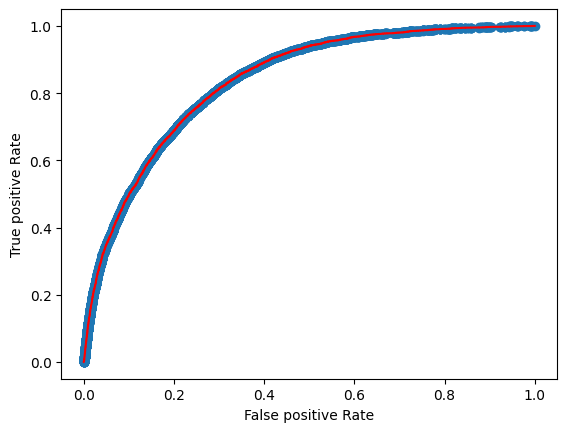

Area under curve: 83.568


In [63]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,dummy = roc_curve(Y,df["Y_probabilities"])

import matplotlib.pyplot as plt
plt.scatter(x = fpr,y=tpr)
plt.plot(fpr,tpr,color='red')
plt.ylabel("True positive Rate")
plt.xlabel("False positive Rate")
plt.show()

auc = roc_auc_score(Y,df["Y_probabilities"])
print("Area under curve:", (auc*100).round(3))

An AUC-ROC of 0.83 suggests a strong ability of the model to distinguish "yes" and "no" classes in predicting client subscription to a term deposit.